# Prepare phenotype


In [5]:

setwd("/medpop/esp2/mesbah/projects/ch_progression/aric/pheno/")
library(data.table)
library(readxl)

In [6]:
##### Visit 05 Samples with ARIC ID
## WES CRAM V05
aric_v05 <- fread("Visit05_ARIC_GWAS_cramid.csv", header = T)

# novaseq_sampinfo <- read_excel("ARIC_CHIP_demographics_Bx001-049_20220329_ForMesbah_sj_Clean.xlsx")
novaseq_sampinfo <- fread("ARIC_CHIP_demographics_Bx001-049_20220329_ForMesbah_sj_Clean.csv", 
                          header=T, na.strings = "")
aric_v05 <- merge(aric_v05,
                  novaseq_sampinfo[novaseq_sampinfo$VisitID=="V05",
                                   c(6,8,9)], by="GWAS_ID")
str(aric_v05)

Classes 'data.table' and 'data.frame':	4234 obs. of  6 variables:
 $ GWAS_ID     : chr  "A00004" "A00009" "A00012" "A00013" ...
 $ GWASID_Visit: chr  "A00004_V05" "A00009_V05" "A00012_V05" "A00013_V05" ...
 $ cram_id     : chr  "H5TH7DSX2-2-IDUDI0072" "HNTCYDSX2-2-IDUDI0060" "HNTGWDSX2-1-IDUDI0006" "HKNWTDSX2-3-IDUDI0063" ...
 $ Visit       : chr  "V05" "V05" "V05" "V05" ...
 $ Gender      : chr  "F" "F" "F" "M" ...
 $ Age         : int  71 76 79 82 82 83 71 71 77 84 ...
 - attr(*, ".internal.selfref")=<externalptr> 
 - attr(*, "sorted")= chr "GWAS_ID"


In [7]:
## ARICID linker
aric_linker_art <- fread("ARIC_TopMED_ID_linker.tsv", header = T)

aric_v05.mapped1 <- merge(aric_v05, aric_linker_art,
                         by.x="GWAS_ID", by.y="gwasid")

names(aric_v05.mapped1) <- c(names(aric_v05.mapped1)[1:6],"ARIC_ID")


## Baseline
aric_baseline <- fread("aric_baseline.N10881_ch_status.2023Mar20.csv", 
                       header = T)

aric_v05.mapped2 <- merge(aric_v05, aric_baseline[,c(1,3)],
                         by.x="GWAS_ID", by.y="gwasid")

names(aric_v05.mapped2) <- c(names(aric_v05.mapped2)[1:6],"ARIC_ID")

aric_v05.mapped <- as.data.frame(rbind(aric_v05.mapped1,
                                       aric_v05.mapped2))

length(unique(aric_v05.mapped$GWAS_ID))
# 4233

[1] 4233

In [8]:
## Remove duplicates and save
aric_v05.mapped <- subset(aric_v05.mapped, !duplicated(aric_v05.mapped$GWASID_Visit))
str(aric_v05.mapped)
# fwrite(aric_v05.mapped, "aric_v05.mapped.csv", row.names = F, col.names = T, sep=",")


'data.frame':	4233 obs. of  7 variables:
 $ GWAS_ID     : chr  "A00004" "A00009" "A00012" "A00013" ...
 $ GWASID_Visit: chr  "A00004_V05" "A00009_V05" "A00012_V05" "A00013_V05" ...
 $ cram_id     : chr  "H5TH7DSX2-2-IDUDI0072" "HNTCYDSX2-2-IDUDI0060" "HNTGWDSX2-1-IDUDI0006" "HKNWTDSX2-3-IDUDI0063" ...
 $ Visit       : chr  "V05" "V05" "V05" "V05" ...
 $ Gender      : chr  "F" "F" "F" "M" ...
 $ Age         : int  71 76 79 82 82 83 71 71 77 84 ...
 $ ARIC_ID     : chr  "M102321" "F101210" "W121907" "M263966" ...


## Load CH variants

In [9]:
cat("CH at baseline\n")
ch_var_in_baseline <- fread("../Returned_CH_call/baseline_CH_variants_in_aric_hiseq_novaseq_samevisit.maxDP_noDup.plusPileup.2023Jan30.csv", header = T)
head(ch_var_in_baseline)

cat("CH at Visit 05\n")
ch_var_in_v05 <- fread("../Returned_CH_call/ch_var_in_v05.plusPileup.2023Jan30.csv", header = T)
head(ch_var_in_v05)

CH at baseline


cram_id,GWASID_Visit,GWAS_ID,Visit,CHR,POS,REF,ALT,Gene,AD,...,Accession,transcriptOI,NonsynOI,Func.refGene,ExonicFunc.refGene,AAChange.refGene,Batch,varID,varID_GWASID,varID_GWASID_Visit
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
A04109,A04109_V02,A04109,V02,chrX,48793225,GAC,G,GATA1,"97,5",...,NM_002049,GATA1:NM_002049:exon5:c.799_800del:p.L268Vfs*75,L268Vfs*75,exonic,frameshift deletion,GATA1:NM_002049:exon5:c.799_800del:p.L268Vfs*75,Hiseq,chrX_48793225_GAC_G,chrX_48793225_GAC_G_A04109,chrX_48793225_GAC_G_A04109_V02
CIPA15086,A15086_V02,A15086,V02,chrX,48792433,C,T,GATA1,"114,4",...,NM_002049,GATA1:NM_002049:exon4:c.C709T:p.Q237X,Q237X,exonic,stopgain,GATA1:NM_002049:exon4:c.C709T:p.Q237X,Hiseq,chrX_48792433_C_T,chrX_48792433_C_T_A15086,chrX_48792433_C_T_A15086_V02
A00165,A00165_V02,A00165,V02,chrX,45107462,A,AT,KDM6A,"60,10",...,NM_021140,KDM6A:NM_021140:exon27:c.3932dupT:p.A1312Cfs*21,A1312Cfs*21,exonic,frameshift insertion,"KDM6A:NM_001291418:exon25:c.3695dupT:p.A1233Cfs*21,KDM6A:NM_001291421:exon25:c.3044dupT:p.A1016Cfs*21,KDM6A:NM_001291417:exon26:c.3797dupT:p.A1267Cfs*21,KDM6A:NM_001291416:exon27:c.3953dupT:p.A1319Cfs*21,KDM6A:NM_021140:exon27:c.3932dupT:p.A1312Cfs*21,KDM6A:NM_001291415:exon28:c.4088dupT:p.A1364Cfs*21",Hiseq,chrX_45107462_A_AT,chrX_45107462_A_AT_A00165,chrX_45107462_A_AT_A00165_V02
A05375,A05375_V03,A05375,V03,chrX,45090722,G,T,KDM6A,"77,4",...,NM_021140,NM_021140:exon26:c.3737-1G>T;NM_001291418:exon24:c.3500-1G>T;NM_001291421:exon24:c.2849-1G>T;NM_001291415:exon27:c.3893-1G>T;NM_001291416:exon26:c.3758-1G>T;NM_001291417:exon25:c.3602-1G>T,nan,splicing,.,.,Hiseq,chrX_45090722_G_T,chrX_45090722_G_T_A05375,chrX_45090722_G_T_A05375_V03
A02676,A02676_V02,A02676,V02,chrX,45089932,T,A,KDM6A,"37,3",...,NM_021140,NM_021140:exon25:c.3736+2T>A;NM_001291418:exon23:c.3499+2T>A;NM_001291421:exon23:c.2848+2T>A;NM_001291415:exon26:c.3892+2T>A;NM_001291416:exon25:c.3757+2T>A;NM_001291417:exon24:c.3601+2T>A,nan,splicing,.,.,Hiseq,chrX_45089932_T_A,chrX_45089932_T_A_A02676,chrX_45089932_T_A_A02676_V02
A00708,A00708_V02,A00708,V02,chrX,45089892,G,A,KDM6A,"92,3",...,NM_021140,KDM6A:NM_021140:exon25:c.G3698A:p.W1233X,W1233X,exonic,stopgain,"KDM6A:NM_001291418:exon23:c.G3461A:p.W1154X,KDM6A:NM_001291421:exon23:c.G2810A:p.W937X,KDM6A:NM_001291417:exon24:c.G3563A:p.W1188X,KDM6A:NM_001291416:exon25:c.G3719A:p.W1240X,KDM6A:NM_021140:exon25:c.G3698A:p.W1233X,KDM6A:NM_001291415:exon26:c.G3854A:p.W1285X",Hiseq,chrX_45089892_G_A,chrX_45089892_G_A_A00708,chrX_45089892_G_A_A00708_V02


CH at Visit 05


GWASID_Visit,cram_id,GWAS_ID,Visit,CHR,POS,REF,ALT,Gene,AD,...,RR.Alt,Accession,transcriptOI,NonsynOI,Func.refGene,ExonicFunc.refGene,AAChange.refGene,varID,varID_GWASID,varID_GWASID_Visit
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,...,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
A00004_V05,H5TH7DSX2-2-IDUDI0072,A00004,V05,chr2,25244539,C,A,DNMT3A,"88,44",...,14,NM_022552,NM_175629:exon14:c.1667+1G>T;NM_153759:exon10:c.1100+1G>T;NM_022552:exon14:c.1667+1G>T;NM_001320893:exon9:c.1211+1G>T,nan,splicing,.,.,chr2_25244539_C_A,chr2_25244539_C_A_A00004,chr2_25244539_C_A_A00004_V05
A00013_V05,HKNWTDSX2-3-IDUDI0063,A00013,V05,chr4,105275783,C,A,TET2,"37,19",...,11,NM_001127208,TET2:NM_001127208:exon11:c.C5273A:p.S1758X,S1758X,exonic,stopgain,TET2:NM_001127208:exon11:c.C5273A:p.S1758X,chr4_105275783_C_A,chr4_105275783_C_A_A00013,chr4_105275783_C_A_A00013_V05
A00030_V05,H25CJDSX3-3-IDUDI0030,A00030,V05,chr2,25241616,C,CCG,DNMT3A,"165,7",...,4,NM_022552,DNMT3A:NM_022552:exon17:c.2027_2028insCG:p.H677Gfs*29,H677Gfs*29,exonic,frameshift insertion,"DNMT3A:NM_001320893:exon12:c.1571_1572insCG:p.H525Gfs*29,DNMT3A:NM_153759:exon13:c.1460_1461insCG:p.H488Gfs*29,DNMT3A:NM_022552:exon17:c.2027_2028insCG:p.H677Gfs*29,DNMT3A:NM_175629:exon17:c.2027_2028insCG:p.H677Gfs*29",chr2_25241616_C_CCG,chr2_25241616_C_CCG_A00030,chr2_25241616_C_CCG_A00030_V05
A00030_V05,H25CJDSX3-3-IDUDI0030,A00030,V05,chr2,25247615,C,T,DNMT3A,"150,12",...,7,NM_022552,DNMT3A:NM_022552:exon8:c.G990A:p.W330X,W330X,exonic,stopgain,"DNMT3A:NM_001320893:exon3:c.G534A:p.W178X,DNMT3A:NM_153759:exon4:c.G423A:p.W141X,DNMT3A:NM_022552:exon8:c.G990A:p.W330X,DNMT3A:NM_175629:exon8:c.G990A:p.W330X",chr2_25247615_C_T,chr2_25247615_C_T_A00030,chr2_25247615_C_T_A00030_V05
A00039_V05,H25CLDSX3-2-IDUDI0002,A00039,V05,chrX,44961295,CT,C,KDM6A,"30,3",...,1,NM_021140,KDM6A:NM_021140:exon3:c.238delT:p.Y80Mfs*4,Y80Mfs*4,exonic,frameshift deletion,"KDM6A:NM_001291415:exon3:c.238delT:p.Y80Mfs*4,KDM6A:NM_001291416:exon3:c.238delT:p.Y80Mfs*4,KDM6A:NM_001291417:exon3:c.238delT:p.Y80Mfs*4,KDM6A:NM_001291418:exon3:c.238delT:p.Y80Mfs*4,KDM6A:NM_021140:exon3:c.238delT:p.Y80Mfs*4",chrX_44961295_CT_C,chrX_44961295_CT_C_A00039,chrX_44961295_CT_C_A00039_V05
A00115_V05,HK3MMDSX2-1-IDUDI0006,A00115,V05,chr20,32435180,T,A,ASXL1,"115,4",...,2,NM_015338,ASXL1:NM_015338:exon12:c.T2468A:p.L823X,L823X,exonic,stopgain,"ASXL1:NM_001363734:exon11:c.T2285A:p.L762X,ASXL1:NM_015338:exon12:c.T2468A:p.L823X",chr20_32435180_T_A,chr20_32435180_T_A_A00115,chr20_32435180_T_A_A00115_V05


### Filter CH call


In [10]:
## DP>=20; AD>=3, FR/RR/>=1 
## Special Filter for U2AF1: min AD>=5
    # Baseline samples
ch_var_in_baseline_qcd <- subset(ch_var_in_baseline, 
                                 (ch_var_in_baseline$GWAS_ID!="A04109" & ch_var_in_baseline$DP>=20 & ch_var_in_baseline$VAF>=0.02 & 
                                 ch_var_in_baseline$FR.Alt>=1 & ch_var_in_baseline$RR.Alt>=1) &
                                  (ch_var_in_baseline$AD.Alt>=3 & ch_var_in_baseline$Gene !="U2AF1") |
                                 (ch_var_in_baseline$AD.Alt>=5 & ch_var_in_baseline$Gene=="U2AF1")) 
## # based-on IGV review: exclude mutations in "A04109"; 
# 49 indels in same sample; lots of indels in nearby regions as well

str(ch_var_in_baseline_qcd)

Classes 'data.table' and 'data.frame':	1370 obs. of  25 variables:
 $ cram_id           : chr  "CIPA15086" "A00165" "A05375" "A02676" ...
 $ GWASID_Visit      : chr  "A15086_V02" "A00165_V02" "A05375_V03" "A02676_V02" ...
 $ GWAS_ID           : chr  "A15086" "A00165" "A05375" "A02676" ...
 $ Visit             : chr  "V02" "V02" "V03" "V02" ...
 $ CHR               : chr  "chrX" "chrX" "chrX" "chrX" ...
 $ POS               : int  48792433 45107462 45090722 45089932 45089892 45089741 45089741 45085870 45083505 45082791 ...
 $ REF               : chr  "C" "A" "G" "T" ...
 $ ALT               : chr  "T" "AT" "T" "A" ...
 $ Gene              : chr  "GATA1" "KDM6A" "KDM6A" "KDM6A" ...
 $ AD                : chr  "114,4" "60,10" "77,4" "37,3" ...
 $ VAF               : num  0.033 0.139 0.037 0.085 0.04 0.063 0.049 0.157 0.1 0.064 ...
 $ DP                : int  118 70 81 40 95 52 74 20 60 72 ...
 $ AD.Alt            : int  4 10 4 3 3 3 4 4 5 4 ...
 $ FR.Alt            : int  3 4 2 1 1 2 2 2 

In [11]:
sort(table(ch_var_in_baseline_qcd$Gene))


  GATA1   GATA2   IKZF2   IKZF3    NRAS PRPF40B   IKZF1   PRPF8  PTPN11   SRSF2 
      1       1       1       1       1       1       2       2       2       2 
    WT1    CTCF    CUX1     EED    ETV6     KIT    KRAS   RUNX1    IDH2    PTEN 
      2       3       3       3       3       3       3       3       4       4 
   JAK2   ASXL2    CBLB    EZH2    PHF6  SETDB1   ZRSR2  BCORL1    NXF1    BCOR 
      5       7       7       7       7       7       7       8       8       9 
   GNB1     NF1   RAD21   U2AF1    SMC3     CBL   SUZ12  ZBTB33   BRCC3   PPM1D 
      9      10      10      10      13      14      14      15      17      17 
  SF3B1   STAG1   SETD2  CREBBP   KDM6A   STAG2   EP300    PHIP  ZNF318    TP53 
     17      18      20      22      22      22      23      29      29      30 
  PDS5B   SRCAP   YLPM1   ASXL1    TET2  DNMT3A 
     31      35      41      66     230     489 

In [12]:
    # Visit 05 samples

ch_var_in_v05_qcd <- subset(ch_var_in_v05, 
                            (ch_var_in_v05$DP>=20 & ch_var_in_v05$VAF>=0.02 & 
                             ch_var_in_v05$FR.Alt>=1 & ch_var_in_v05$RR.Alt>=1) &
                            (ch_var_in_v05$AD.Alt>=3 & ch_var_in_v05$Gene !="U2AF1") |
                            (ch_var_in_v05$AD.Alt>=5 & ch_var_in_v05$Gene=="U2AF1")) 

str(ch_var_in_v05_qcd)

sort(table(ch_var_in_v05_qcd$Gene))

Classes 'data.table' and 'data.frame':	1311 obs. of  24 variables:
 $ GWASID_Visit      : chr  "A00004_V05" "A00013_V05" "A00030_V05" "A00030_V05" ...
 $ cram_id           : chr  "H5TH7DSX2-2-IDUDI0072" "HKNWTDSX2-3-IDUDI0063" "H25CJDSX3-3-IDUDI0030" "H25CJDSX3-3-IDUDI0030" ...
 $ GWAS_ID           : chr  "A00004" "A00013" "A00030" "A00030" ...
 $ Visit             : chr  "V05" "V05" "V05" "V05" ...
 $ CHR               : chr  "chr2" "chr4" "chr2" "chr2" ...
 $ POS               : int  25244539 105275783 25241616 25247615 44961295 32435180 25243931 25241587 105261795 25241591 ...
 $ REF               : chr  "C" "C" "C" "C" ...
 $ ALT               : chr  "A" "A" "CCG" "T" ...
 $ Gene              : chr  "DNMT3A" "TET2" "DNMT3A" "DNMT3A" ...
 $ AD                : chr  "88,44" "37,19" "165,7" "150,12" ...
 $ VAF               : num  0.332 0.345 0.046 0.089 0.094 0.045 0.181 0.372 0.036 0.031 ...
 $ DP                : int  132 56 172 162 33 119 67 137 177 152 ...
 $ AD.Alt            : 


BCORL1   CBLB   CTCF   ETV6   IDH1  IKZF2    KIT    MPL  RUNX1 SETBP1  SETD2 
     1      1      1      1      1      1      1      1      1      1      1 
  BCOR   BRAF  EP300   EZH2 PTPN11  RAD21  SUZ12 CREBBP   NXF1   PHF6   PTEN 
     2      2      2      2      2      2      2      3      3      3      3 
  CUX1   NRAS  KDM6A   KRAS  PRPF8  ASXL2   IDH2   PHIP    NF1  ZRSR2   GNB1 
     4      4      5      5      5      6      7      7      8      8      9 
   CBL  PDS5B  U2AF1  BRCC3  SRCAP  YLPM1   JAK2  STAG2 ZBTB33 ZNF318  SRSF2 
    10     11     12     13     14     14     18     19     25     25     29 
  TP53  PPM1D  SF3B1  ASXL1   TET2 DNMT3A 
    31     41     42     97    258    547 

In [20]:
## Save filtered variant files
# fwrite(ch_var_in_v05_qcd, "ch_var_in_v05_qcd.23Mar2023.csv", row.names = F, col.names = T, sep=",", quote = T)
# fwrite(ch_var_in_baseline_qcd, "ch_var_in_baseline_qcd.23Mar2023.csv", row.names = F, col.names = T, sep=",", quote = T)

## Annotate CH status

### Baseline visit
#### Prevalent CH

In [13]:
## Annotate whole baseline file
    # VAF>=2%
aric_baseline$CH_baseline <- ifelse(aric_baseline$gwasid %in% ch_var_in_baseline_qcd$GWAS_ID, 1, 0)
cat("CH Base VAF>=2%:\n")
table(aric_baseline$CH_baseline,exclude = NULL)
    # VAF>=10%
aric_baseline$CHvaf10_baseline <- ifelse(aric_baseline$CH_baseline==1 & aric_baseline$gwasid %in% 
                                           ch_var_in_baseline_qcd$GWAS_ID[ch_var_in_baseline_qcd$VAF>=0.10], 1, 0)
cat("VAF>=10%:\n")
table(aric_baseline$CHvaf10_baseline,exclude = NULL)

  # CH status in samples with both v2 and v5 WES
aric_baseline$CH_baseline_v05 <- ifelse( aric_baseline$CH_baseline==1 & (aric_baseline$gwasid %in% aric_v05.mapped$GWAS_ID) &
                                        (aric_baseline$gwasid %in% ch_var_in_v05_qcd$GWAS_ID), 1, 
                                         ifelse(aric_baseline$CH_baseline==0 & 
                                                aric_baseline$gwasid %in% aric_v05.mapped$GWAS_ID, 0, NA))
cat("CH present at both visit:\n")
table(aric_baseline$CH_baseline_v05, exclude = NULL)

aric_baseline$CHvaf10_baseline_v05 <- ifelse(aric_baseline$CHvaf10_baseline==1 & 
                                             (aric_baseline$gwasid %in% aric_v05.mapped$GWAS_ID) & 
                                             (aric_baseline$gwasid %in% ch_var_in_v05_qcd$GWAS_ID[ch_var_in_v05_qcd$VAF>=0.10]), 
                                             1, 
                                             ifelse(aric_baseline$CHvaf10_baseline==0 & 
                                                    (aric_baseline$gwasid %in% aric_v05.mapped$GWAS_ID) &
                                                    !(aric_baseline$gwasid %in% ch_var_in_v05_qcd$GWAS_ID[ch_var_in_v05_qcd$VAF>=0.10]), 
                                                    0, NA))
cat("CHvaf10_baseline_v05:\n")
table(aric_baseline$CHvaf10_baseline_v05, exclude = NULL)

## DTA: DNMT3A, TET2, ASXL1
aric_baseline$CH_DTA <- ifelse(aric_baseline$CH_baseline==1 & 
                               aric_baseline$gwasid %in% 
                               ch_var_in_baseline_qcd$GWAS_ID[ch_var_in_baseline_qcd$Gene %in%
                                                              c("DNMT3A", "TET2", "ASXL1") ], 
                               1, 
                               ifelse(aric_baseline$CH_baseline==0,
                                      0,NA))
cat("DTA:\n")
table(aric_baseline$CH_DTA,exclude = NULL)

## Splicing Factor SF: c("SF3B1", "U2AF1", "SRSF2", "ZRSR2")
aric_baseline$CH_SF <- ifelse(aric_baseline$CH_baseline==1 & 
                               aric_baseline$gwasid %in% 
                               ch_var_in_baseline_qcd$GWAS_ID[ch_var_in_baseline_qcd$Gene %in%
                                                              c("SF3B1", "U2AF1", "SRSF2", "ZRSR2") ], 
                               1, 
                               ifelse(aric_baseline$CH_baseline==0,
                                      0,NA))
cat("SF:\n")
table(aric_baseline$CH_SF,exclude = NULL)

## DDR: TP53, PPM1D 
aric_baseline$CH_DDR <- ifelse(aric_baseline$CH_baseline==1 & 
                               aric_baseline$gwasid %in% 
                               ch_var_in_baseline_qcd$GWAS_ID[ch_var_in_baseline_qcd$Gene %in%
                                                              c("PPM1D", "TP53") ], 
                               1, 
                               ifelse(aric_baseline$CH_baseline==0,
                                      0,NA))
cat("DDR:\n")
table(aric_baseline$CH_DDR,exclude = NULL)

aric_baseline$CH_DNMT3A <- ifelse(aric_baseline$CH_baseline==1 & 
                               aric_baseline$gwasid %in% 
                               ch_var_in_baseline_qcd$GWAS_ID[ch_var_in_baseline_qcd$Gene == "DNMT3A"], 
                               1, 
                               ifelse(aric_baseline$CH_baseline==0,
                                      0,NA))
cat("DNMT3A:\n")
table(aric_baseline$CH_DNMT3A,exclude = NULL)

aric_baseline$CH_TET2  <- ifelse(aric_baseline$CH_baseline==1 & 
                               aric_baseline$gwasid %in% 
                               ch_var_in_baseline_qcd$GWAS_ID[ch_var_in_baseline_qcd$Gene =="TET2"], 
                               1, 
                               ifelse(aric_baseline$CH_baseline==0,
                                      0,NA))
cat("TET2:\n")
table(aric_baseline$CH_TET2,exclude = NULL)

aric_baseline$CH_ASXL1  <- ifelse(aric_baseline$CH_baseline==1 & 
                               aric_baseline$gwasid %in% 
                               ch_var_in_baseline_qcd$GWAS_ID[ch_var_in_baseline_qcd$Gene == "ASXL1"], 
                               1, 
                               ifelse(aric_baseline$CH_baseline==0,
                                      0,NA))
cat("ASXL1:\n")
table(aric_baseline$CH_ASXL1,exclude = NULL)

str(aric_baseline)

CH Base VAF>=2%:



   0    1 
9787 1094 

VAF>=10%:



    0     1 
10433   448 

CH present at both visit:



   0    1 <NA> 
3732  312 6837 

CHvaf10_baseline_v05:



   0    1 <NA> 
3645  113 7123 

DTA:



   0    1 <NA> 
9787  700  394 

SF:



   0    1 <NA> 
9787   36 1058 

DDR:



   0    1 <NA> 
9787   46 1048 

DNMT3A:



   0    1 <NA> 
9787  451  643 

TET2:



   0    1 <NA> 
9787  216  878 

ASXL1:



   0    1 <NA> 
9787   65 1029 

Classes 'data.table' and 'data.frame':	10881 obs. of  55 variables:
 $ gwasid              : chr  "A03873" "A11144" "A01476" "A02423" ...
 $ hg38_CRAM_ID        : chr  "10047" "10382" "10566" "10665" ...
 $ aricid              : chr  "J136997" "J211628" "J201860" "J207189" ...
 $ Visit               : chr  "V01" "V01" "V01" "V01" ...
 $ sex                 : chr  "F" "F" "F" "F" ...
 $ race                : chr  "B" "B" "B" "B" ...
 $ center              : chr  "J" "J" "J" "J" ...
 $ dob                 : IDate, format: "1939-01-25" "1934-09-01" ...
 $ date_base           : IDate, format: "1887-06-29" "1888-07-25" ...
 $ age_base            : int  48 53 56 63 58 51 62 62 54 63 ...
 $ fast_8_base         : int  0 1 1 1 1 1 1 1 1 1 ...
 $ bmi_base            : num  30.5 30.4 27.3 24.8 29.1 ...
 $ dm_126_base         : int  0 0 0 0 1 0 0 NA 0 0 ...
 $ gluc_base           : num  5.88 4.83 5.29 5.02 7.11 ...
 $ htn_5_base          : int  1 0 1 0 1 0 0 1 1 1 ...
 $ chol_base           : num 

In [61]:
## Save full baseline file
# fwrite(aric_baseline, "aric_baseline_N10881.pheno_ch_status.23Mar2023.csv", row.names=F, col.names=T, sep=",")

### Longitudinal Visit (Visit 05)

In [14]:
## Vist 05 samples with gwasid, aricid, age, sex
aric_v05.mapped <- fread("aric_v05.mapped.csv", header = T, sep=",")
str(aric_v05.mapped)

Classes 'data.table' and 'data.frame':	4233 obs. of  7 variables:
 $ GWAS_ID     : chr  "A00004" "A00009" "A00012" "A00013" ...
 $ GWASID_Visit: chr  "A00004_V05" "A00009_V05" "A00012_V05" "A00013_V05" ...
 $ cram_id     : chr  "H5TH7DSX2-2-IDUDI0072" "HNTCYDSX2-2-IDUDI0060" "HNTGWDSX2-1-IDUDI0006" "HKNWTDSX2-3-IDUDI0063" ...
 $ Visit       : chr  "V05" "V05" "V05" "V05" ...
 $ Gender      : chr  "F" "F" "F" "M" ...
 $ Age         : int  71 76 79 82 82 83 71 71 77 84 ...
 $ ARIC_ID     : chr  "M102321" "F101210" "W121907" "M263966" ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [15]:
# sample w/o baseline wes, coded as "NA"
# AD.ALT >=3; VAF>=2%; F/R>=1; DP>=20
aric_v05.mapped$CH_baseline <- ifelse( (aric_v05.mapped$GWAS_ID %in% aric_baseline$gwasid) & 
                                         (aric_v05.mapped$GWAS_ID %in% 
                                          ch_var_in_baseline_qcd$GWAS_ID), 
                                      1, ifelse( (aric_v05.mapped$GWAS_ID %in% aric_baseline$gwasid) &
                                                !(aric_v05.mapped$GWAS_ID %in% ch_var_in_baseline_qcd$GWAS_ID), 
                                                0, NA )  )


table(aric_v05.mapped$CH_baseline, exclude = NULL)

# 44 V05 samples w/o baseline WES data
# 4189 V05 samples with baseline WES data


   0    1 <NA> 
3732  457   44 

In [16]:
## CH at Visit 05
aric_v05.mapped$CH_v05 <- ifelse( (aric_v05.mapped$GWAS_ID %in% aric_baseline$gwasid) & 
                                         (aric_v05.mapped$GWAS_ID %in% 
                                          ch_var_in_v05_qcd$GWAS_ID), 
                                      1, ifelse( (aric_v05.mapped$GWAS_ID %in% aric_baseline$gwasid) &
                                                !(aric_v05.mapped$GWAS_ID %in% ch_var_in_v05_qcd$GWAS_ID), 
                                                0, NA )  )


table(aric_v05.mapped$CH_v05, exclude = NULL)


   0    1 <NA> 
3142 1047   44 

### Incident CH

In [17]:
## Incident CH at VAF>=2% at V05; absent at baseline
## Both visit available
## Prevalent (ant missing samples) CH coded as "NA" and will be excluded

aric_v05.mapped$incident_CH <- ifelse( (aric_v05.mapped$GWAS_ID  %in% aric_baseline$gwasid) &  
                                         aric_v05.mapped$GWAS_ID %in% ch_var_in_v05_qcd$GWAS_ID
                                      [!(ch_var_in_v05_qcd$GWAS_ID %in% ch_var_in_baseline_qcd$GWAS_ID)], 1, 
                                       ifelse( ( (aric_v05.mapped$GWAS_ID  %in% aric_baseline$gwasid) & 
                                                aric_v05.mapped$CH_baseline==0 & aric_v05.mapped$CH_v05==0),0, NA))

table(aric_v05.mapped$incident_CH, exclude = NULL)


   0    1 <NA> 
2997  735  501 

In [18]:
## Incident CH at VAF>=5% at V05; absent at baseline (VAF<2%) 
aric_v05.mapped$incident_CHvaf05 <- ifelse( (aric_v05.mapped$GWAS_ID  %in% aric_baseline$gwasid) &  
                                              aric_v05.mapped$GWAS_ID %in% ch_var_in_v05_qcd$GWAS_ID[ ch_var_in_v05_qcd$VAF>=0.05 & !(ch_var_in_v05_qcd$GWAS_ID %in% ch_var_in_baseline_qcd$GWAS_ID)], 1, 
                                            ifelse( ((aric_v05.mapped$GWAS_ID  %in% aric_baseline$gwasid) & 
                                                     (aric_v05.mapped$CH_baseline==0 & aric_v05.mapped$CH_v05==0)), 0, NA))

table(aric_v05.mapped$incident_CHvaf05, exclude = NULL)


   0    1 <NA> 
2997  574  662 

In [19]:
## Incident CH at VAF>=10% at V05; absent at baseline (VAF<2%) 
aric_v05.mapped$incident_CHvaf10 <- ifelse( (aric_v05.mapped$GWAS_ID  %in% aric_baseline$gwasid) &  
                                              aric_v05.mapped$GWAS_ID %in% ch_var_in_v05_qcd$GWAS_ID[ ch_var_in_v05_qcd$VAF>=0.10 & !(ch_var_in_v05_qcd$GWAS_ID %in% ch_var_in_baseline_qcd$GWAS_ID)], 1, 
                                            ifelse( ((aric_v05.mapped$GWAS_ID  %in% aric_baseline$gwasid) & 
                                                     (aric_v05.mapped$CH_baseline==0 & aric_v05.mapped$CH_v05==0)), 0, NA))

table(aric_v05.mapped$incident_CHvaf10, exclude = NULL)


   0    1 <NA> 
2997  272  964 

In [20]:
# DNMT3A
aric_v05.mapped$incident_DNMT3A <- ifelse( aric_v05.mapped$incident_CH==1 & 
                                       aric_v05.mapped$GWAS_ID %in% ch_var_in_v05_qcd$GWAS_ID
                                       [ ch_var_in_v05_qcd$Gene %in% c("DNMT3A")], 1, 
                                        ifelse( aric_v05.mapped$CH_baseline==0 & 
                                                 !is.na(aric_v05.mapped$CH_baseline) &
                                                   (aric_v05.mapped$CH_v05 ==0 | aric_v05.mapped$incident_CH==0 |  
                                                    aric_v05.mapped$GWAS_ID %in% ch_var_in_v05_qcd$GWAS_ID
                                                    [!(ch_var_in_v05_qcd$Gene %in% c("DNMT3A"))]), 
                                               0, NA))
                                                     

table(aric_v05.mapped$incident_DNMT3A, exclude = NULL)


   0    1 <NA> 
3419  313  501 

In [21]:
# TET2
aric_v05.mapped$incident_TET2 <- ifelse( aric_v05.mapped$incident_CH==1 & 
                                       aric_v05.mapped$GWAS_ID %in% ch_var_in_v05_qcd$GWAS_ID
                                       [ ch_var_in_v05_qcd$Gene %in% c("TET2")], 1, 
                                        ifelse( aric_v05.mapped$CH_baseline==0 & 
                                                 !is.na(aric_v05.mapped$CH_baseline) &
                                                   (aric_v05.mapped$CH_v05 ==0 | aric_v05.mapped$incident_CH==0 |  
                                                    aric_v05.mapped$GWAS_ID %in% ch_var_in_v05_qcd$GWAS_ID
                                                    [!(ch_var_in_v05_qcd$Gene %in% c("TET2"))]), 
                                               0, NA))
                                                     

table(aric_v05.mapped$incident_TET2, exclude = NULL)


   0    1 <NA> 
3564  168  501 

In [22]:
# ASXL1
aric_v05.mapped$incident_ASXL1 <- ifelse( aric_v05.mapped$incident_CH==1 & 
                                       aric_v05.mapped$GWAS_ID %in% ch_var_in_v05_qcd$GWAS_ID
                                       [ ch_var_in_v05_qcd$Gene %in% c("ASXL1")], 1, 
                                        ifelse( aric_v05.mapped$CH_baseline==0 & 
                                                 !is.na(aric_v05.mapped$CH_baseline) &
                                                   (aric_v05.mapped$CH_v05 ==0 | aric_v05.mapped$incident_CH==0 |  
                                                    aric_v05.mapped$GWAS_ID %in% ch_var_in_v05_qcd$GWAS_ID
                                                    [!(ch_var_in_v05_qcd$Gene %in% c("ASXL1"))]), 
                                               0, NA))
                                                     

table(aric_v05.mapped$incident_ASXL1, exclude = NULL)



   0    1 <NA> 
3667   65  501 

In [23]:
### Gene-categories
# Groupings
aric_v05.mapped$incident_DTA <- ifelse( aric_v05.mapped$incident_CH==1 & 
                                       aric_v05.mapped$GWAS_ID %in% ch_var_in_v05_qcd$GWAS_ID
                                       [ ch_var_in_v05_qcd$Gene %in% c("ASXL1","DNMT3A","TET2")], 1, 
                                        ifelse( aric_v05.mapped$CH_baseline==0 & 
                                                 !is.na(aric_v05.mapped$CH_baseline) &
                                                   (aric_v05.mapped$CH_v05 ==0 | aric_v05.mapped$incident_CH==0 |  
                                                    aric_v05.mapped$GWAS_ID %in% ch_var_in_v05_qcd$GWAS_ID
                                                    [!(ch_var_in_v05_qcd$Gene %in% c("ASXL1","DNMT3A","TET2"))]), 
                                               0, NA))
                                                     

table(aric_v05.mapped$incident_DTA, exclude = NULL)


   0    1 <NA> 
3214  518  501 

In [24]:
# Splicing factors: SF3B1, U2AF1, SRSF2, ZRSR2
aric_v05.mapped$incident_SF <- ifelse( aric_v05.mapped$incident_CH==1 & 
                                       aric_v05.mapped$GWAS_ID %in% ch_var_in_v05_qcd$GWAS_ID
                                       [ ch_var_in_v05_qcd$Gene %in% c("SF3B1", "U2AF1", "SRSF2", "ZRSR2")], 1, 
                                        ifelse( aric_v05.mapped$CH_baseline==0 & 
                                                 !is.na(aric_v05.mapped$CH_baseline) &
                                                   (aric_v05.mapped$CH_v05 ==0 | aric_v05.mapped$incident_CH==0 |  
                                                    aric_v05.mapped$GWAS_ID %in% ch_var_in_v05_qcd$GWAS_ID
                                                    [!(ch_var_in_v05_qcd$Gene %in% c("SF3B1", "U2AF1", "SRSF2", "ZRSR2"))]), 
                                               0, NA))
                                                     

table(aric_v05.mapped$incident_SF, exclude = NULL)


   0    1 <NA> 
3666   66  501 

In [25]:
# DNA damage repair: TP53, PPM1D
aric_v05.mapped$incident_DDR <- ifelse( aric_v05.mapped$incident_CH==1 & 
                                       aric_v05.mapped$GWAS_ID %in% ch_var_in_v05_qcd$GWAS_ID
                                       [ ch_var_in_v05_qcd$Gene %in% c("PPM1D", "TP53")], 1, 
                                        ifelse( aric_v05.mapped$CH_baseline==0 & 
                                                 !is.na(aric_v05.mapped$CH_baseline) &
                                                   (aric_v05.mapped$CH_v05 ==0 | aric_v05.mapped$incident_CH==0 |  
                                                    aric_v05.mapped$GWAS_ID %in% ch_var_in_v05_qcd$GWAS_ID
                                                    [!(ch_var_in_v05_qcd$Gene %in% c("PPM1D", "TP53"))]), 
                                               0, NA))

table(aric_v05.mapped$incident_DDR, exclude = NULL)


   0    1 <NA> 
3682   50  501 

In [26]:
## Save full baseline file
# fwrite(aric_v05.mapped, "aric_v05.mapped_N4233.demo_ch_status.23Mar2023.csv", row.names=F, col.names=T, sep=",")

In [27]:
## Vist 05 samples with gwasid, aricid, age, sex
aric_v05.mapped <- fread("aric_v05.mapped_N4233.demo_ch_status.23Mar2023.csv", header = T, sep=",")
str(aric_v05.mapped)

Classes 'data.table' and 'data.frame':	4233 obs. of  18 variables:
 $ GWAS_ID         : chr  "A00004" "A00009" "A00012" "A00013" ...
 $ GWASID_Visit    : chr  "A00004_V05" "A00009_V05" "A00012_V05" "A00013_V05" ...
 $ cram_id         : chr  "H5TH7DSX2-2-IDUDI0072" "HNTCYDSX2-2-IDUDI0060" "HNTGWDSX2-1-IDUDI0006" "HKNWTDSX2-3-IDUDI0063" ...
 $ Visit           : chr  "V05" "V05" "V05" "V05" ...
 $ Gender          : chr  "F" "F" "F" "M" ...
 $ Age             : int  71 76 79 82 82 83 71 71 77 84 ...
 $ ARIC_ID         : chr  "M102321" "F101210" "W121907" "M263966" ...
 $ CH_baseline     : int  1 0 0 1 0 0 0 0 0 0 ...
 $ CH_v05          : int  1 0 0 1 0 0 0 0 0 0 ...
 $ incident_CH     : int  NA 0 0 NA 0 0 0 0 0 0 ...
 $ incident_CHvaf05: int  NA 0 0 NA 0 0 0 0 0 0 ...
 $ incident_CHvaf10: int  NA 0 0 NA 0 0 0 0 0 0 ...
 $ incident_DNMT3A : int  NA 0 0 NA 0 0 0 0 0 0 ...
 $ incident_TET2   : int  NA 0 0 NA 0 0 0 0 0 0 ...
 $ incident_ASXL1  : int  NA 0 0 NA 0 0 0 0 0 0 ...
 $ incident_DTA  

#### Covariates

In [28]:
  # longitudinal visit pheno  
aric_longitudinal <- fread("bcm/aric_longitudinal_vanilla.tsv", header = T, sep="\t")
aric_v05_col <- c("aricid", names(aric_longitudinal)[grep(pattern = "v5", x = names(aric_longitudinal), ignore.case = T)])
aric_visit05 <- aric_longitudinal[, ..aric_v05_col]
str(aric_longitudinal)

Classes 'data.table' and 'data.frame':	15792 obs. of  140 variables:
 $ aricid       : chr  "F100047" "F100146" "F100152" "F100256" ...
 $ sex_v1       : chr  "F" "M" "F" "M" ...
 $ race_v1      : chr  "W" "W" "B" "W" ...
 $ center_v1    : chr  "F" "F" "F" "F" ...
 $ dob_v1       : IDate, format: "1926-07-04" "1923-11-30" ...
 $ date_v1      : IDate, format: "1886-11-24" "1886-11-24" ...
 $ age_v1       : int  60 62 47 54 55 55 63 62 61 53 ...
 $ fast_8_v1    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ bmi_v1       : num  25.7 26 25.5 27.7 26.1 ...
 $ dm_126_v1    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ gluc_v1      : num  5.51 5.29 4.65 5.35 5.61 ...
 $ htn_5_v1     : int  1 0 0 0 0 1 0 0 1 0 ...
 $ chol_v1      : num  3.9 5.9 4.47 5.77 3.93 ...
 $ hdl_v1       : num  2.02 1.94 1.77 1.32 1.05 ...
 $ ldl_v1       : num  1.61 3.19 2.44 3.71 2.49 ...
 $ tg_v1        : num  0.61 1.671 0.587 1.614 0.858 ...
 $ chol_med_v1  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ statin_v1    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ ci

In [29]:
aric_v05.mapped_pheno <- merge(aric_v05.mapped, 
                               aric_longitudinal[, c(1, 92:109, 
                                                     115, 121, 127,
                                                     133,138,139)], 
                             by.x="ARIC_ID", by.y="aricid")

str(aric_v05.mapped_pheno)

Classes 'data.table' and 'data.frame':	4233 obs. of  42 variables:
 $ ARIC_ID         : chr  "F100601" "F100785" "F100920" "F101063" ...
 $ GWAS_ID         : chr  "A09377" "A07720" "A14695" "A14432" ...
 $ GWASID_Visit    : chr  "A09377_V05" "A07720_V05" "A14695_V05" "A14432_V05" ...
 $ cram_id         : chr  "HW2Y3DSX2-3-IDUDI0054" "HYV73DSXY-3-IDUDI0054" "HY2KGDSX2-2-IDUDI0058" "HW2Y3DSX2-3-IDUDI0046" ...
 $ Visit           : chr  "V05" "V05" "V05" "V05" ...
 $ Gender          : chr  "F" "F" "F" "M" ...
 $ Age             : int  83 75 83 81 83 76 76 70 87 82 ...
 $ CH_baseline     : int  0 0 0 1 0 0 0 0 0 0 ...
 $ CH_v05          : int  1 0 1 1 1 0 0 1 0 0 ...
 $ incident_CH     : int  1 0 1 NA 1 0 0 1 0 0 ...
 $ incident_CHvaf05: int  1 0 1 NA 1 0 0 1 0 0 ...
 $ incident_CHvaf10: int  1 0 1 NA NA 0 0 NA 0 0 ...
 $ incident_DNMT3A : int  1 0 1 NA 0 0 0 1 0 0 ...
 $ incident_TET2   : int  0 0 0 NA 0 0 0 0 0 0 ...
 $ incident_ASXL1  : int  0 0 0 NA 0 0 0 0 0 0 ...
 $ incident_DTA    : 

In [30]:
## Scale continus variables
aric_v05.mapped_pheno$bmi_v5_std <- scale(aric_v05.mapped_pheno$bmi_v5)
aric_v05.mapped_pheno$gluc_v5_std <- scale(aric_v05.mapped_pheno$gluc_v5)
aric_v05.mapped_pheno$chol_v5_std <- scale(aric_v05.mapped_pheno$chol_v5)
aric_v05.mapped_pheno$hdl_v5_std <- scale(aric_v05.mapped_pheno$hdl_v5)
aric_v05.mapped_pheno$ldl_v5_std <- scale(aric_v05.mapped_pheno$ldl_v5)
aric_v05.mapped_pheno$tg_v5_std <- scale(aric_v05.mapped_pheno$tg_v5)
aric_v05.mapped_pheno$non_hdl_v5_std <- scale(aric_v05.mapped_pheno$chol_v5 - aric_v05.mapped_pheno$hdl_v5)

str(aric_v05.mapped_pheno)

Classes 'data.table' and 'data.frame':	4233 obs. of  49 variables:
 $ ARIC_ID         : chr  "F100601" "F100785" "F100920" "F101063" ...
 $ GWAS_ID         : chr  "A09377" "A07720" "A14695" "A14432" ...
 $ GWASID_Visit    : chr  "A09377_V05" "A07720_V05" "A14695_V05" "A14432_V05" ...
 $ cram_id         : chr  "HW2Y3DSX2-3-IDUDI0054" "HYV73DSXY-3-IDUDI0054" "HY2KGDSX2-2-IDUDI0058" "HW2Y3DSX2-3-IDUDI0046" ...
 $ Visit           : chr  "V05" "V05" "V05" "V05" ...
 $ Gender          : chr  "F" "F" "F" "M" ...
 $ Age             : int  83 75 83 81 83 76 76 70 87 82 ...
 $ CH_baseline     : int  0 0 0 1 0 0 0 0 0 0 ...
 $ CH_v05          : int  1 0 1 1 1 0 0 1 0 0 ...
 $ incident_CH     : int  1 0 1 NA 1 0 0 1 0 0 ...
 $ incident_CHvaf05: int  1 0 1 NA 1 0 0 1 0 0 ...
 $ incident_CHvaf10: int  1 0 1 NA NA 0 0 NA 0 0 ...
 $ incident_DNMT3A : int  1 0 1 NA 0 0 0 1 0 0 ...
 $ incident_TET2   : int  0 0 0 NA 0 0 0 0 0 0 ...
 $ incident_ASXL1  : int  0 0 0 NA 0 0 0 0 0 0 ...
 $ incident_DTA    : 

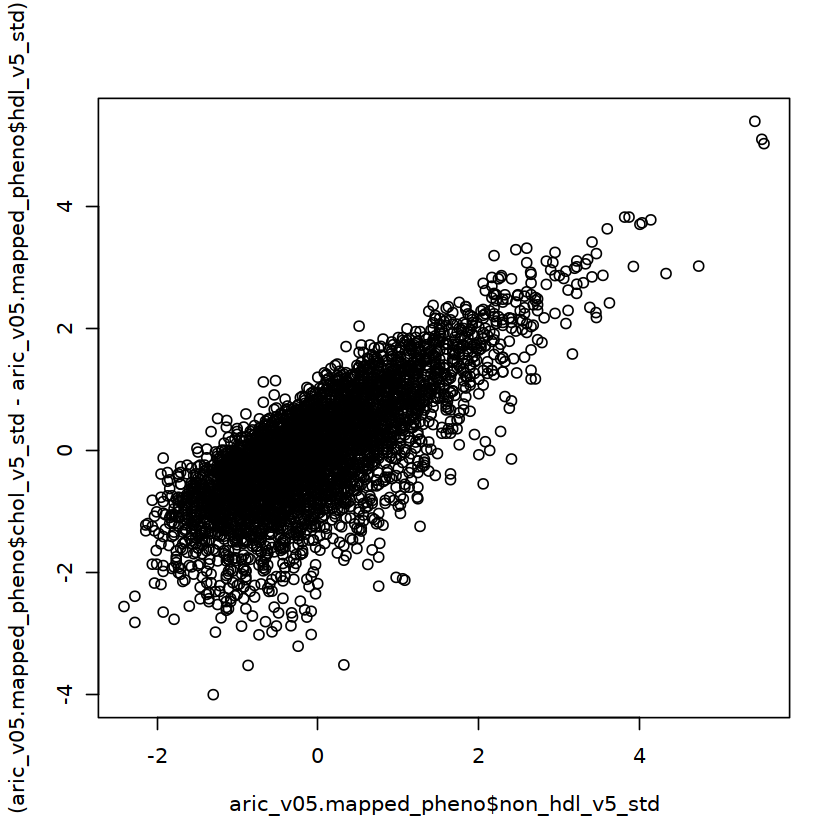

In [31]:

plot (aric_v05.mapped_pheno$non_hdl_v5_std, 
     (aric_v05.mapped_pheno$chol_v5_std-aric_v05.mapped_pheno$hdl_v5_std))



In [32]:
## Save demo, pheno, and ch_status
# fwrite(aric_v05.mapped_pheno, 
 #      "aric_v05.mapped_N4233.phenoV5_demo_ch_status.23Mar2023.csv", 
  #     row.names = F, col.names = T, sep=",", na = "NA")


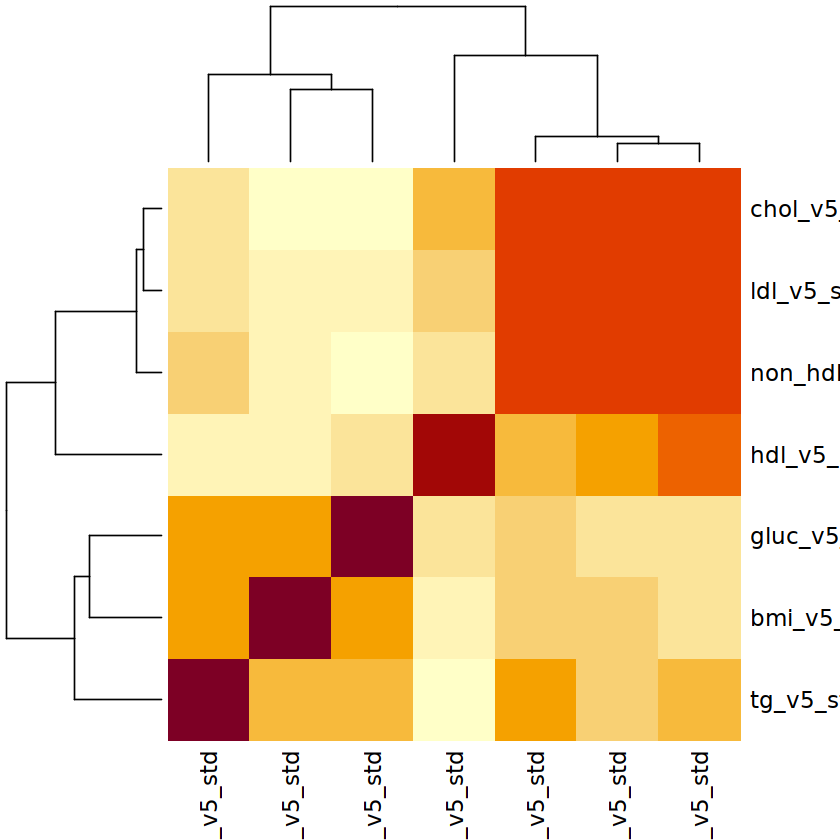

In [34]:
heatmap(cor(aric_v05.mapped_pheno[,c(43,44,45,46,47,48,49)], use="complete"))

## Baseline and longitudinal visit phenotypes

In [35]:
aric_v05.mapped_pheno <- fread("aric_v05.mapped_N4233.phenoV5_demo_ch_status.23Mar2023.csv", header=T)
str(aric_v05.mapped_pheno)

Classes 'data.table' and 'data.frame':	4233 obs. of  49 variables:
 $ ARIC_ID         : chr  "F100601" "F100785" "F100920" "F101063" ...
 $ GWAS_ID         : chr  "A09377" "A07720" "A14695" "A14432" ...
 $ GWASID_Visit    : chr  "A09377_V05" "A07720_V05" "A14695_V05" "A14432_V05" ...
 $ cram_id         : chr  "HW2Y3DSX2-3-IDUDI0054" "HYV73DSXY-3-IDUDI0054" "HY2KGDSX2-2-IDUDI0058" "HW2Y3DSX2-3-IDUDI0046" ...
 $ Visit           : chr  "V05" "V05" "V05" "V05" ...
 $ Gender          : chr  "F" "F" "F" "M" ...
 $ Age             : int  83 75 83 81 83 76 76 70 87 82 ...
 $ CH_baseline     : int  0 0 0 1 0 0 0 0 0 0 ...
 $ CH_v05          : int  1 0 1 1 1 0 0 1 0 0 ...
 $ incident_CH     : int  1 0 1 NA 1 0 0 1 0 0 ...
 $ incident_CHvaf05: int  1 0 1 NA 1 0 0 1 0 0 ...
 $ incident_CHvaf10: int  1 0 1 NA NA 0 0 NA 0 0 ...
 $ incident_DNMT3A : int  1 0 1 NA 0 0 0 1 0 0 ...
 $ incident_TET2   : int  0 0 0 NA 0 0 0 0 0 0 ...
 $ incident_ASXL1  : int  0 0 0 NA 0 0 0 0 0 0 ...
 $ incident_DTA    : 

In [36]:
aric_baseline <- fread("aric_baseline_N10881.pheno_ch_status.23Mar2023.csv", header=T)

aric_baseline$CH_baseline =NULL

str(aric_baseline)

Classes 'data.table' and 'data.frame':	10881 obs. of  54 variables:
 $ gwasid              : chr  "A03873" "A11144" "A01476" "A02423" ...
 $ hg38_CRAM_ID        : chr  "10047" "10382" "10566" "10665" ...
 $ aricid              : chr  "J136997" "J211628" "J201860" "J207189" ...
 $ Visit               : chr  "V01" "V01" "V01" "V01" ...
 $ sex                 : chr  "F" "F" "F" "F" ...
 $ race                : chr  "B" "B" "B" "B" ...
 $ center              : chr  "J" "J" "J" "J" ...
 $ dob                 : IDate, format: "1939-01-25" "1934-09-01" ...
 $ date_base           : IDate, format: "1887-06-29" "1888-07-25" ...
 $ age_base            : int  48 53 56 63 58 51 62 62 54 63 ...
 $ fast_8_base         : int  0 1 1 1 1 1 1 1 1 1 ...
 $ bmi_base            : num  30.5 30.4 27.3 24.8 29.1 ...
 $ dm_126_base         : int  0 0 0 0 1 0 0 NA 0 0 ...
 $ gluc_base           : num  5.88 4.83 5.29 5.02 7.11 ...
 $ htn_5_base          : int  1 0 1 0 1 0 0 1 1 1 ...
 $ chol_base           : num 

In [37]:
table(aric_baseline$gwasid %in% aric_v05.mapped_pheno$GWAS_ID, exclude = NULL)


FALSE  TRUE 
 6692  4189 

In [38]:
# Merge Baseline and longitudinal data
aric_baseline_n_v05 <- merge(aric_v05.mapped_pheno, aric_baseline, 
                             by.x="GWAS_ID", by.y="gwasid")
str(aric_baseline_n_v05)


Classes 'data.table' and 'data.frame':	4189 obs. of  102 variables:
 $ GWAS_ID             : chr  "A00004" "A00009" "A00012" "A00013" ...
 $ ARIC_ID             : chr  "M102321" "F101210" "W121907" "M263966" ...
 $ GWASID_Visit        : chr  "A00004_V05" "A00009_V05" "A00012_V05" "A00013_V05" ...
 $ cram_id             : chr  "H5TH7DSX2-2-IDUDI0072" "HNTCYDSX2-2-IDUDI0060" "HNTGWDSX2-1-IDUDI0006" "HKNWTDSX2-3-IDUDI0063" ...
 $ Visit.x             : chr  "V05" "V05" "V05" "V05" ...
 $ Gender              : chr  "F" "F" "F" "M" ...
 $ Age                 : int  71 76 79 82 82 83 71 71 77 84 ...
 $ CH_baseline         : int  1 0 0 1 0 0 0 0 0 0 ...
 $ CH_v05              : int  1 0 0 1 0 0 0 0 0 0 ...
 $ incident_CH         : int  NA 0 0 NA 0 0 0 0 0 0 ...
 $ incident_CHvaf05    : int  NA 0 0 NA 0 0 0 0 0 0 ...
 $ incident_CHvaf10    : int  NA 0 0 NA 0 0 0 0 0 0 ...
 $ incident_DNMT3A     : int  NA 0 0 NA 0 0 0 0 0 0 ...
 $ incident_TET2       : int  NA 0 0 NA 0 0 0 0 0 0 ...
 $ incident_

In [39]:
table(aric_baseline_n_v05$chol_med_base, aric_baseline_n_v05$chol_med_v5)

   
       0    1
  0 1766 2165
  1   26  203

In [40]:
table(aric_baseline_n_v05$cig_base, aric_baseline_n_v05$ever_smoke, exclude = NULL)

      
          0    1 <NA>
  1       0  634    0
  2       0 1635    0
  3    1909    0    0
  <NA>    0    0   11

In [41]:
aric_baseline_n_v05$nonHDL_base_std <- scale(aric_baseline_n_v05$chol_base - aric_baseline_n_v05$hdl_base)
summary(aric_baseline_n_v05$nonHDL_base_std)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
-0.29760 -0.15385 -0.11935  0.00000 -0.08198 11.33280       15 

In [42]:
aric_baseline_n_v05$hdl_base_std <- scale(aric_baseline_n_v05$hdl_base)
summary(aric_baseline_n_v05$hdl_base_std)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
-0.33005 -0.16843 -0.12226  0.00000 -0.06222 17.86062       15 

In [43]:
aric_baseline_n_v05$ldl_base_std <- scale(aric_baseline_n_v05$ldl_base)
summary(aric_baseline_n_v05$ldl_base_std)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
-0.3245 -0.1555 -0.1198  0.0000 -0.0800 11.6095      74 

In [44]:
aric_baseline_n_v05$chol_base_std <- scale(aric_baseline_n_v05$chol_base)
summary(aric_baseline_n_v05$chol_base_std)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
-0.23628 -0.14501 -0.11941  0.00000 -0.09048 10.64029        5 

In [45]:
aric_baseline_n_v05$tg_base_std <- scale(aric_baseline_n_v05$tg_base)
summary(aric_baseline_n_v05$tg_base_std)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
-0.17035 -0.13752 -0.11756  0.00000 -0.08795 19.90966        5 

In [46]:
aric_baseline_n_v05$age_base_sqr <- aric_baseline_n_v05$age_base^2
summary(aric_baseline_n_v05$age_base_sqr)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2025    2601    3025    3108    3481    6889 

In [47]:
aric_baseline_n_v05$Center <-  as.factor(ifelse(aric_baseline_n_v05$center=="M", "M", 
                                                ifelse(aric_baseline_n_v05$center=="W", "W", "F_J")))

table(aric_baseline_n_v05$Center ) 


 F_J    M    W 
1653 1526 1010 

In [48]:
# fwrite(aric_baseline_n_v05, "aric_baseline_n_v05_N10881.pheno_ch_status.23Mar2023.csv", 
 #      row.names = F, col.names = T, sep=",", na = "NA")

## Trajactory annotations in 1.2.1.clonal_expansion